# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

In [81]:
import numpy as np
import pandas as pd
from datetime import datetime
import time
import matplotlib
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.



**Question 1**<br>
(5pts) Create a new variable, DELAY_OR_NOT: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (ARRIVAL_DELAY >= 15).

In [82]:
#Load the data
df = pd.read_csv("cs109a_midterm.csv")

In [83]:
#Display the first couple columns
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,9.0,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,0.0,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-1.0,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,11.0,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-4.0,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN


In [84]:
#Let's first clean our dataframe
#See where the missing values are
cols_missing_values = df.columns[df.isnull().any()]
cols_missing_values

Index(['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [85]:
#Let's see if we have any missing values in the 'ARRIVAL_DELAY' column
np.sum([df.ARRIVAL_DELAY.isnull()])

0

In [160]:
#Create the variable 'DELAY_OR_NOT' in our DataFrame based on if 'ARRIVAL_DELAY_>=15 (min)
#Since we saw we do not have any missing values in ARRIVAL_DELAY column, we can proceed.
DELAY_OR_NOT = (df.ARRIVAL_DELAY >= 15).astype(int)
df['DELAY_OR_NOT'] = DELAY_OR_NOT


**Question 2**<br>(5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used.

**I believe there is several columns which do not help in our analysis**

# DATE 
since we already have variables MONTH and DAY and we know all the data points are from 2015
# SCHEDULED_TIME
is duplicate information since SCHEDULED_TIME = SCHED_ARRIVAL -  SCHED_DEPARTURE
# ELAPSED_TIME 
is duplicate information since ELAPSED_TIME = SCHED_ARRIVAL + ARRIVAL_DELAY - (SCHED_DEPARTURE + DEPARTURE DELAY)
# FLIGHT NUMBER
It is redundant since we have info about origin/destination and scheduled dep/arr time
# TAIL NUMBER
This is indicative of each unique plane. When we have a dataset with 800,000 observations and 4819 planes, it is very unlikely our regression model would be able to recognize if there is a particular plane which causes delay.

# All the delay features
Given the fact we already have a "delay_or_not" response we are seeking, our "types" of delays are not predictors of whether there will be a delay or not. In other words, a type of "delay" will predict the length of the delay but not whether there will be an event of a delay. 

**So, we will get rid of those in our analysis in this subproblem. I already looked for missing values in the previous subquestion and the missing values happen to be only in the columns I am dropping.**

In [87]:
#We copy the dataframe, since it's 2017 and we all have enough memory,right? 

new_df = df.copy(deep=True)

#drop all the columns based on the analysis in the cell above
del new_df['DATE']
del new_df['SCHEDULED_TIME']
del new_df['ELAPSED_TIME']
del new_df['FLIGHT_NUMBER']
del new_df['TAIL_NUMBER']

del new_df['ARRIVAL_DELAY']
del new_df['DEPARTURE_DELAY']
del new_df['AIR_SYSTEM_DELAY']
del new_df['AIRLINE_DELAY']
del new_df['SECURITY_DELAY']
del new_df['LATE_AIRCRAFT_DELAY']
del new_df['WEATHER_DELAY']

**Question 3** <br>
(15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?

In [89]:
#We will ONLY look at the visualisation in the training data we will later use to build our model
#(I am splitting train/test here just for purposes for visualisation, I am later using the same random seed 
#to do it again after preproccessing)

#Subsample the data to reduce the # of observations.
np.random.seed(9001)
new_df_for_viz = new_df.sample(n=100000,random_state=6)
#Split the data in test and training (see Lecture 5)
train_df_viz, data_test_NOT_USE = train_test_split(new_df_for_viz,test_size=0.33, random_state=0)

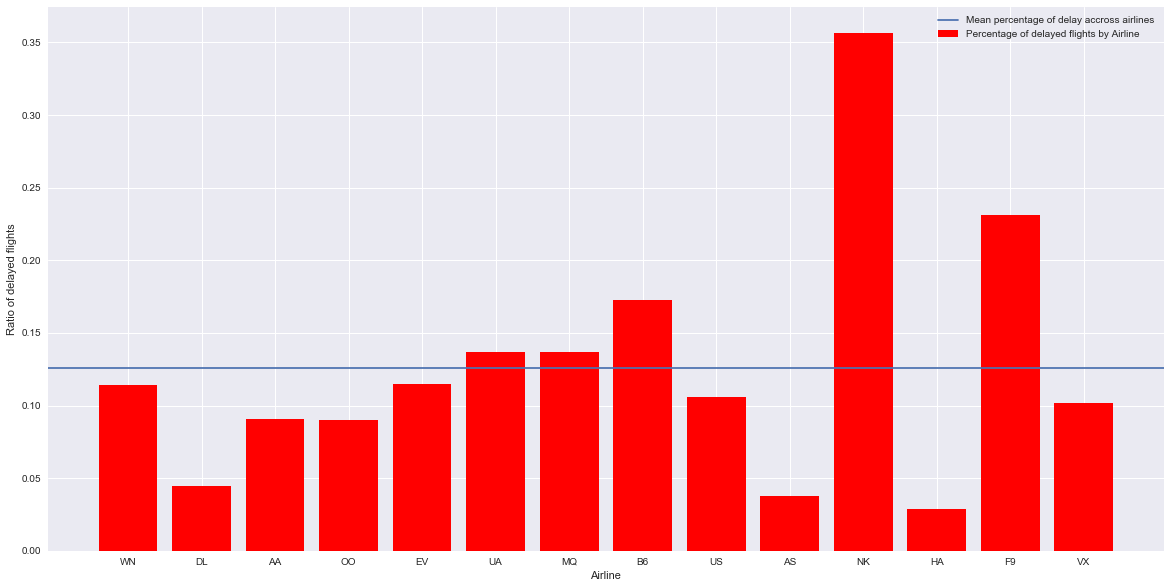

In [90]:
#Let's see what airlines had the highest percentage of delays in 2015
list_of_airlines = [i for i in train_df_viz.AIRLINE.value_counts().index]
airlines_delays = []

for i in list_of_airlines:
    delayed = train_df_viz[train_df_viz.AIRLINE==i][train_df_viz.DELAY_OR_NOT==1].shape[0]
    not_delayed = train_df_viz[train_df_viz.AIRLINE==i][train_df_viz.DELAY_OR_NOT==0].shape[0]
    airlines_delays.append(delayed/(delayed+not_delayed))

plt.figure(figsize=(20,10))
plt.bar([i for i in range(len(airlines_delays))],airlines_delays,color='red',label = "Percentage of delayed flights by Airline")
plt.xticks([i for i in range(len(airlines_delays))],list_of_airlines);
mean_delays=np.mean(airlines_delays)
plt.axhline(mean_delays,label='Mean percentage of delay accross airlines')
plt.legend();
plt.xlabel("Airline")
plt.ylabel("Ratio of delayed flights");

**We see significant differences in the ratio of delayed flights among airlines. For example, "HA" seems to have relatively less delayed flights than "NK"**

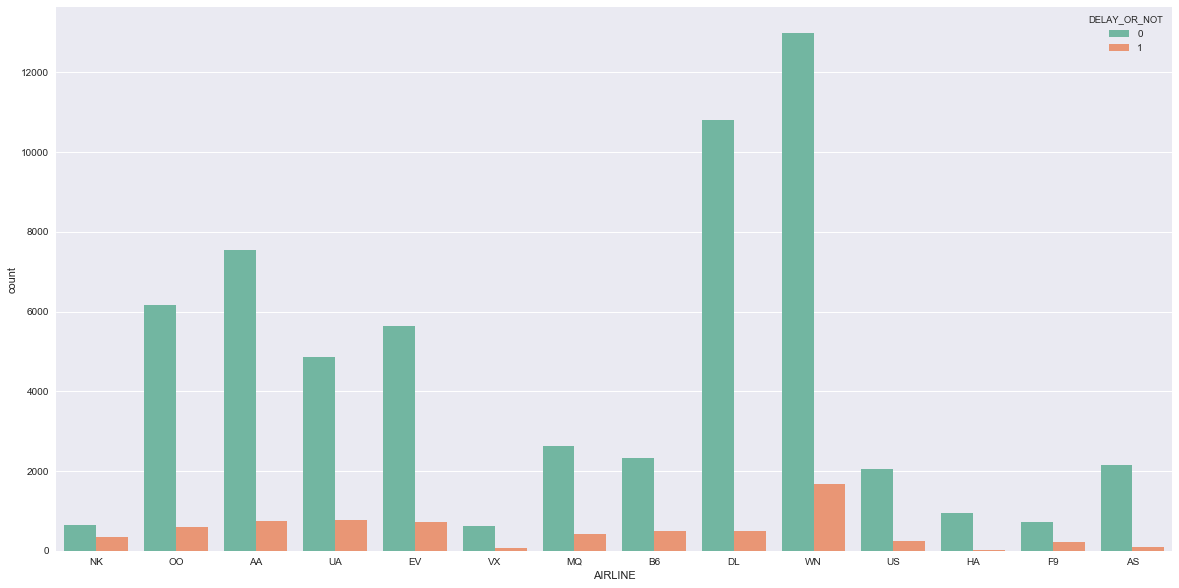

In [91]:
#Let's see which airline had the most delays in 2015 as well as how many flights were not delayed for that airlines (total number)
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
sns.countplot(x='AIRLINE',hue='DELAY_OR_NOT',data=train_df_viz,palette="Set2");

**This graph is related to the one above. However, we are just plotting the absolute number of flights here.**

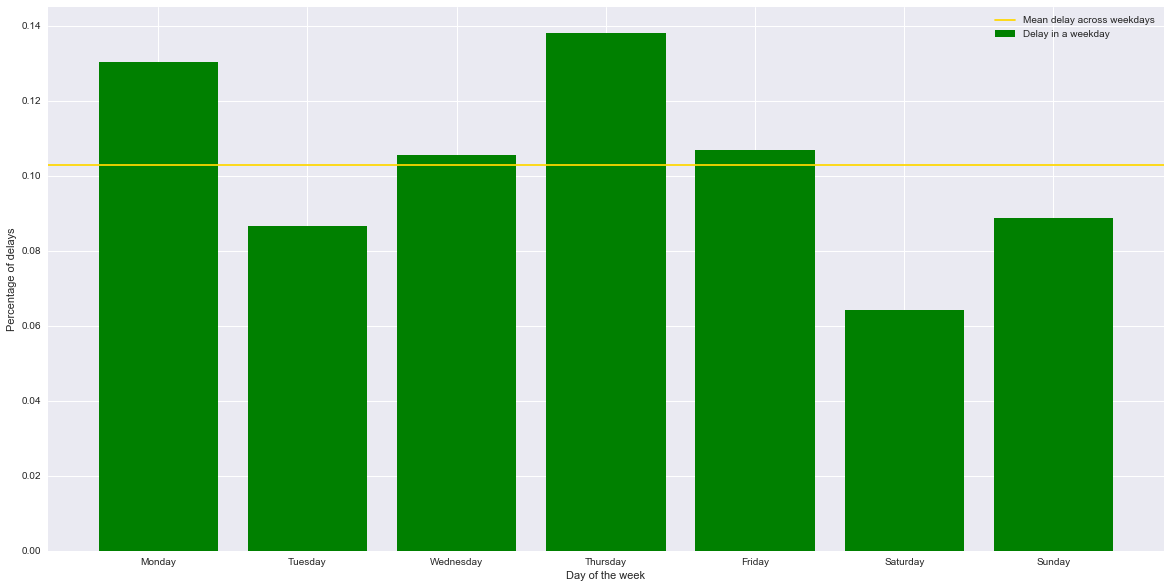

In [92]:
#Let's see what days of the week had the most delays in 2015
weekday_delays = []
for i in range(1,8):
    delays = train_df_viz[train_df_viz.DAY_OF_WEEK==i][train_df_viz.DELAY_OR_NOT==1].shape[0]
    total = train_df_viz[train_df_viz.DAY_OF_WEEK==i].shape[0]
    weekday_delays.append(delays/total)
    
plt.figure(figsize=(20,10))
plt.bar([i for i in range(7)],weekday_delays,color='green',label = "Delay in a weekday")
plt.xticks([i for i in range(7)],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
mean_delays=np.mean(weekday_delays)
plt.axhline(mean_delays,label='Mean delay across weekdays',color='gold')
plt.legend();
plt.xlabel("Day of the week")
plt.ylabel("Percentage of delays");

**This visualisation indicates that certain days have a higher ratio of delayed flights than others. For example, Thursdays have the highest percentage of delayed flights while Saturdays the smallest.**

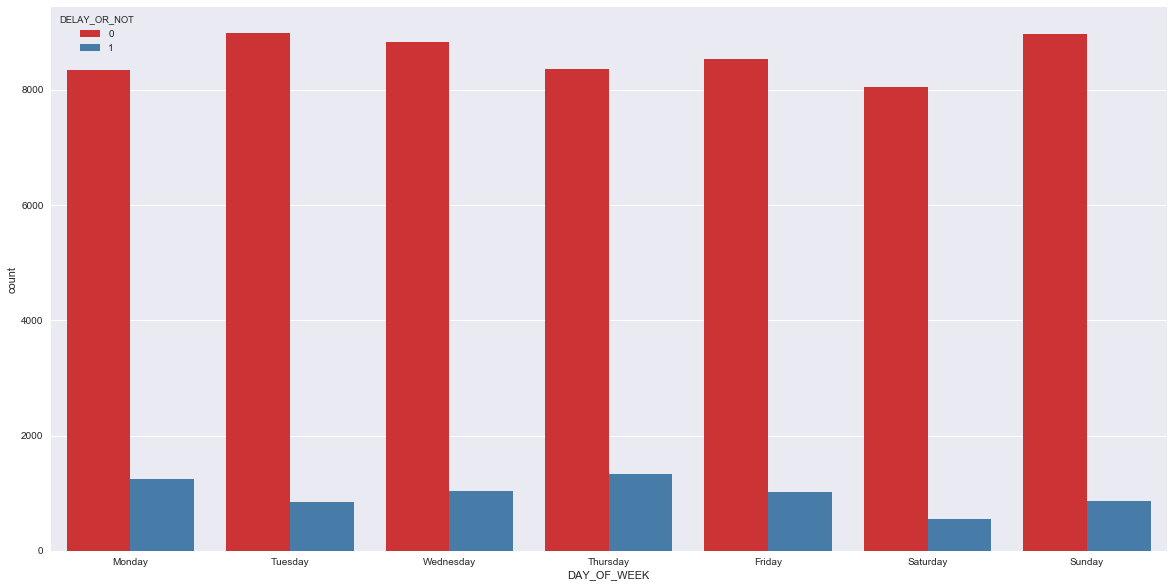

In [93]:
#Let's visualize the total delays per day of the week
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='DAY_OF_WEEK',hue='DELAY_OR_NOT',data=train_df_viz,palette="Set1")
plt.xticks([i for i in range(7)],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

**This graph is related to the one above. However, we are just plotting the absolute number of flights per day of the week here.**


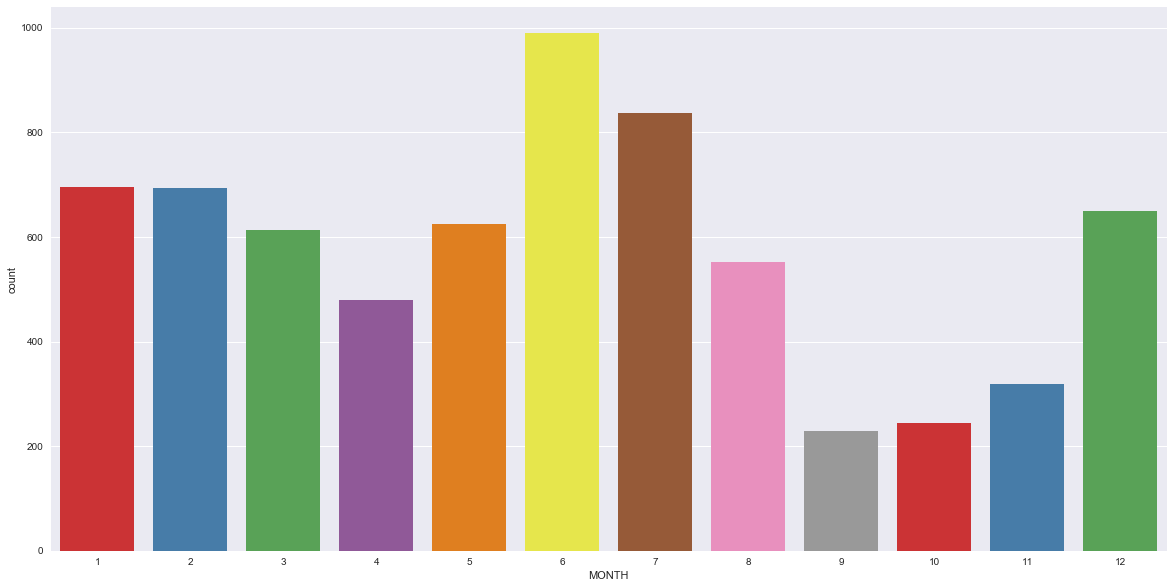

In [94]:
#Let's take a look at how many flights in total were delayed in each month 
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='MONTH',data=train_df_viz[train_df_viz.DELAY_OR_NOT==1],palette="Set1");

**In this graph, we plot the absolute number of delayed flights in any given month. We see that the lowest number of delayed flights is in September/October, while the most delayed flights are in June/July timeframe.**

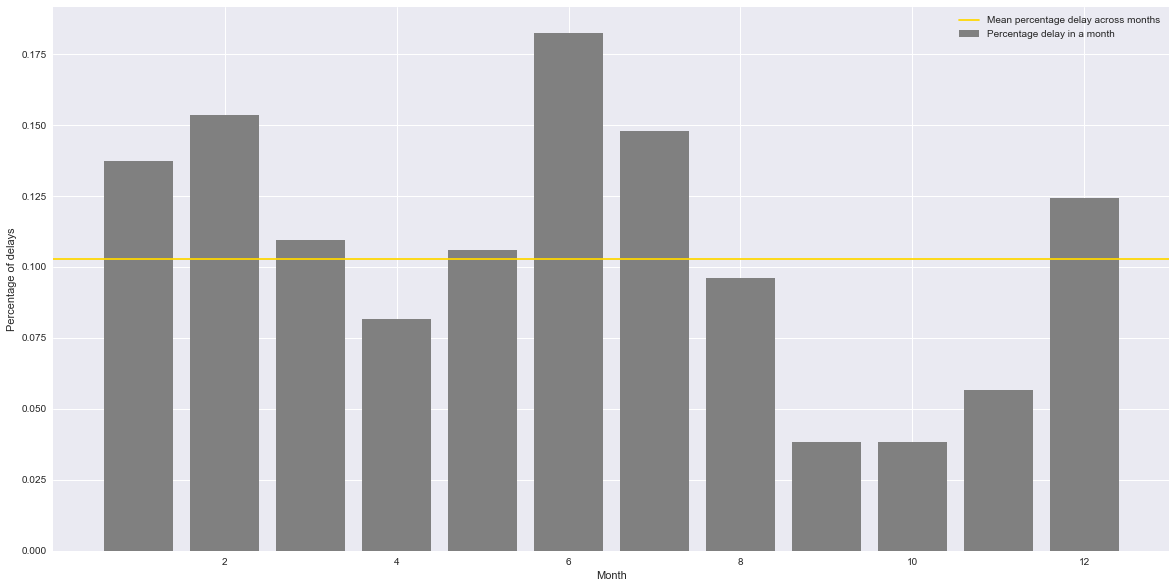

In [95]:
#Let's take a look at the percentage of flights delayed in each month 
months = train_df_viz.groupby('MONTH').mean()
plt.figure(figsize=(20,10))
plt.bar(months.index,months.DELAY_OR_NOT,color='gray',label = "Percentage delay in a month")
plt.axhline(mean_delays,label='Mean percentage delay across months',color='gold')
plt.legend(bbox_to_anchor=(1, 1));
plt.xlabel("Month")
plt.ylabel("Percentage of delays");

**Here, we plot the ratio of flights delayed each month. The trends reflect what the previous graph with absolute numbers displayed.**

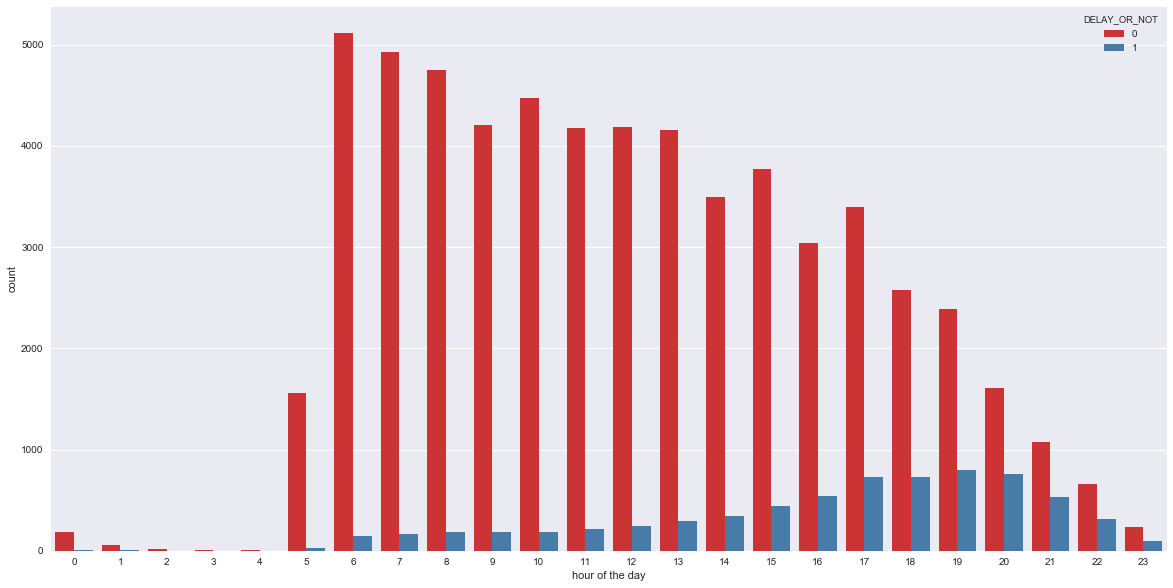

In [96]:
#Number of delayed/not delayed flights departing every hour, also showing the overall traffic at the airports at a given hour

from datetime import datetime
import time

# string to time tuple
date_str = list(train_df_viz.SCHED_DEP)
time_tuples = []
for i in date_str:
    time_tuple = time.strptime(i, "%H:%M:%S")
    time_tuples.append(time_tuple.tm_hour)
train_df_viz['hour_of_dep'] = np.array(time_tuples)

plt.figure(figsize=(20,10))

sns.countplot(x='hour_of_dep',hue='DELAY_OR_NOT',data=train_df_viz,palette="Set1");
plt.xlabel("hour of the day");

**Here we can see the highest number of flights departs in the morning while being the lest delayed, while evening flights are the most delayed and there is less of them than in the morning hours**

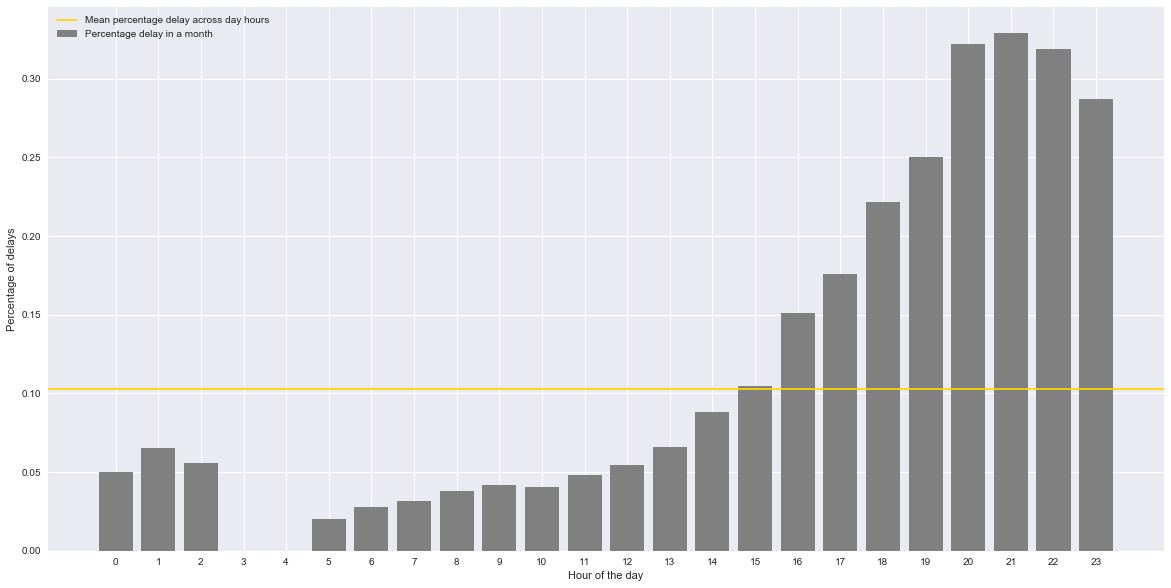

In [97]:
#Now, let's plot the percentage of delayed flights dependent on the time departure

hour_delays=[]
for i in range(24):
    delays = train_df_viz[train_df_viz.hour_of_dep==i][train_df_viz.DELAY_OR_NOT==1].shape[0]
    total = train_df_viz[train_df_viz.hour_of_dep==i].shape[0]
    hour_delays.append(delays/total)

plt.figure(figsize=(20,10))
plt.bar([i for i in range(24)],hour_delays,color='gray',label = "Percentage delay in a month")
plt.xticks([i for i in range(24)],[i for i in range(24)]);
mean_delays=np.mean(weekday_delays)


plt.axhline(mean_delays,label='Mean percentage delay across day hours',color='gold')
plt.legend();
plt.xlabel("Hour of the day")
plt.ylabel("Percentage of delays")
del train_df_viz['hour_of_dep'];


**Seems like most flights are delayed in the evening hours with the peak around 8pm, while morning flights have the least delays.**

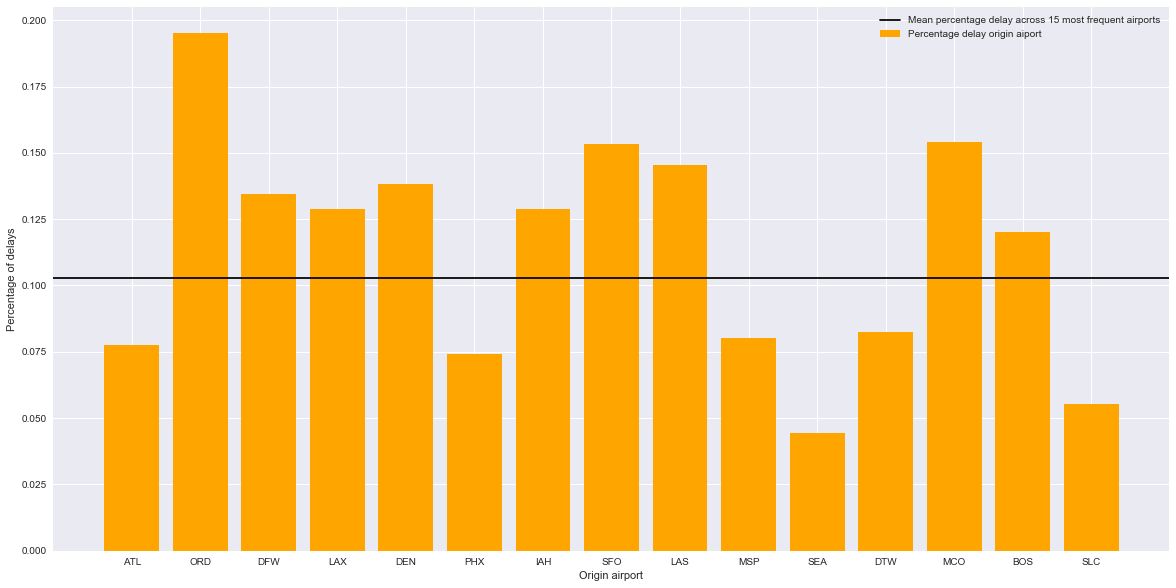

In [98]:
#Let's look at delays at 15 most busy airports (from left as the busiest)

frequent_airports = train_df_viz.ORIGIN_AIRPORT.value_counts().index[0:15]
airport_delays = []
for i in frequent_airports:
    delays = train_df_viz[train_df_viz.ORIGIN_AIRPORT==i][train_df_viz.DELAY_OR_NOT==1].shape[0]
    total = train_df_viz[train_df_viz.ORIGIN_AIRPORT==i].shape[0]
    airport_delays.append(delays/total)

plt.figure(figsize=(20,10))
plt.bar([i for i in range(len(frequent_airports))],airport_delays,color='orange',label = "Percentage delay origin aiport")
plt.xticks([i for i in range(len(frequent_airports))],[i for i in frequent_airports]);
mean_delays=np.mean(weekday_delays)
plt.axhline(mean_delays,label='Mean percentage delay across {} most frequent airports'.format(len(frequent_airports)),color='black')
plt.legend();
plt.xlabel("Origin airport")
plt.ylabel("Percentage of delays");

**Here, we look at the 15 busiest airports (defined as how many flights depart from it in total in 2015). We can see that ORD or MCO have a high percentage of delayed flights while ATL or SEA have a low percentage of delayed flights.**

**Question 4**<br>
(20pts) Build a classification model that classifies delays according to DELAY_OR_NOT. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results.

In [161]:
#Now, we need to convert our categorical variables
cols_to_change =['MONTH','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']

#hot-encode
new_df_dummy = pd.get_dummies(new_df,columns=cols_to_change)

#Subsample the data to reduce the # of observations. 
new_df_sample = new_df_dummy.sample(n=100000,random_state=6)

#Split the data in test and training (see Lecture 5)
np.random.seed(9001)
data_train, data_test = train_test_split(new_df_sample,test_size=0.33, random_state=0)

#Check we actually got the right shapes
print(new_df_sample.shape,df.shape,data_train.shape,data_test.shape)


(100000, 1323) (804941, 22) (67000, 1323) (33000, 1323)


In [100]:
#now create a remaining df to test in Question 6
remaining_df = new_df_dummy.drop(new_df_sample.index)

**Change the scheduled time of dep and arr to decimals**

In [101]:
# string to time tuple TRAIN
date_str_dep = list(data_train.SCHED_DEP)
date_str_arr = list(data_train.SCHED_ARR)
time_tuples_dep = []
time_tuples_arr = []
for i,j in zip(date_str_dep,date_str_arr):
    time_tuple_dep = time.strptime(i, "%H:%M:%S")
    time_tuple_arr = time.strptime(j, "%H:%M:%S")
    time_tuples_dep.append(time_tuple_dep.tm_hour+time_tuple_dep.tm_min/60)
    time_tuples_arr.append(time_tuple_arr.tm_hour+time_tuple_arr.tm_min/60)
data_train['SCHED_DEP'] = np.array(time_tuples_dep)
data_train['SCHED_ARR'] = np.array(time_tuples_arr)

In [102]:
# string to time tuple TEST
date_str_dep = list(data_test.SCHED_DEP)
date_str_arr = list(data_test.SCHED_ARR)
time_tuples_dep = []
time_tuples_arr = []
for i,j in zip(date_str_dep,date_str_arr):
    time_tuple_dep = time.strptime(i, "%H:%M:%S")
    time_tuple_arr = time.strptime(j, "%H:%M:%S")
    time_tuples_dep.append(time_tuple_dep.tm_hour+time_tuple_dep.tm_min/60)
    time_tuples_arr.append(time_tuple_arr.tm_hour+time_tuple_arr.tm_min/60)
data_test['SCHED_DEP'] = np.array(time_tuples_dep)
data_test['SCHED_ARR'] = np.array(time_tuples_arr)

In [103]:
# string to time REMAINING df
date_str_dep = list(remaining_df.SCHED_DEP)
date_str_arr = list(remaining_df.SCHED_ARR)
time_tuples_dep = []
time_tuples_arr = []
for i,j in zip(date_str_dep,date_str_arr):
    time_tuple_dep = time.strptime(i, "%H:%M:%S")
    time_tuple_arr = time.strptime(j, "%H:%M:%S")
    time_tuples_dep.append(time_tuple_dep.tm_hour+time_tuple_dep.tm_min/60)
    time_tuples_arr.append(time_tuple_arr.tm_hour+time_tuple_arr.tm_min/60)
remaining_df['SCHED_DEP'] = np.array(time_tuples_dep)
remaining_df['SCHED_ARR'] = np.array(time_tuples_arr)

In [104]:
#check we converted time to decimals correctly in SCHED_DEP and SCHED_ARR features
data_train.head()

,SCHED_DEP,SCHED_ARR,DISTANCE,DELAY_OR_NOT,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
492825,17.450000,18.883333,460,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152130,12.816667,15.550000,867,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108541,15.750000,17.700000,867,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
508329,12.866667,18.300000,1452,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422830,5.500000,6.616667,201,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Let's take a look at how unbalanced our data (delayed/not delayed) is - I see that only ~10% of observations are delayed flights.**

In [105]:
print(data_train[data_train.DELAY_OR_NOT==1].shape)
print(data_train[data_train.DELAY_OR_NOT==0].shape)

(6929, 1323)
(60071, 1323)


**Finally, before I start building out models, I need to standardize all of our continuous variables**

In [106]:
p_data_train=data_train.copy(deep=True)
p_data_train.loc[:,"SCHED_DEP":"DISTANCE"]=(data_train.loc[:,"SCHED_DEP":"DISTANCE"]-data_train.loc[:,"SCHED_DEP":"DISTANCE"].mean())/data_train.loc[:,"SCHED_DEP":"DISTANCE"].std()

#test set - use mean and std of the training set
p_data_test=data_test.copy(deep=True)
p_data_test.loc[:,"SCHED_DEP":"DISTANCE"]=(data_test.loc[:,"SCHED_DEP":"DISTANCE"]-data_train.loc[:,"SCHED_DEP":"DISTANCE"].mean())/data_train.loc[:,"SCHED_DEP":"DISTANCE"].std()

p_remaining_df = remaining_df.copy(deep=True)
p_remaining_df.loc[:,"SCHED_DEP":"DISTANCE"]=(remaining_df.loc[:,"SCHED_DEP":"DISTANCE"]-data_train.loc[:,"SCHED_DEP":"DISTANCE"].mean())/data_train.loc[:,"SCHED_DEP":"DISTANCE"].std()

In [162]:
p_data_train.shape

(67000, 1323)

**Now, I am ready to try different classification models** <br>

In [108]:
x_train = p_data_train.copy(deep=True).drop('DELAY_OR_NOT',axis=1)
y_train = p_data_train.DELAY_OR_NOT

x_test = p_data_test.copy(deep=True).drop('DELAY_OR_NOT',axis=1)
y_test = p_data_test.DELAY_OR_NOT

**I will use the classification models comparison code from Tuesday section 8 which reviewed last years midterm. However, I will throw out the kNN classification since calculating Euclidean distances between over 1000 predictors would be too computationally expensive**

In [109]:
#following lamda function scores predictions for two-way classifier
score = lambda model, x_train, y_train: pd.Series([model.score(x_train, y_train), 
                                                 model.score(x_train[y_train==0], y_train[y_train==0]),
                                                 model.score(x_train[y_train==1], y_train[y_train==1])], 
                                                index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])
def out_of_box_class(x,y):
    

    #Unweighted logistic regression
    unweighted_logistic = LogisticRegression(C=1000)
    unweighted_logistic.fit(x, y)

    unweighted_log_scores = score(unweighted_logistic, x, y)
    print('unweighted log')


    #Weighted logistic regression
    weighted_logistic = LogisticRegression(C=1000, class_weight='balanced')
    weighted_logistic.fit(x, y)

    weighted_log_scores = score(weighted_logistic, x, y)
    print('weighted log')


    #LDA
    lda = LDA()
    lda.fit(x, y)

    lda_scores = score(lda, x, y)
    print('lda')

    #QDA
    qda = QDA()
    qda.fit(x, y)

    qda_scores = score(qda, x, y)
    print('qda')

    #Decision Tree
    tree = DecisionTree(max_depth=50, class_weight='balanced', criterion='entropy')
    tree.fit(x, y)

    tree_scores = score(tree, x, y)
    print('tree')

    score_df = pd.DataFrame({'unweighted logistic': unweighted_log_scores,
                             'weighted logistic': weighted_log_scores,
                             'lda': lda_scores,
                             'qda': qda_scores,
                             'tree': tree_scores})
    return score_df

In [110]:
out_of_box_class(x_train,y_train)

unweighted log
weighted log
lda
qda
tree


,lda,qda,tree,unweighted logistic,weighted logistic
overall accuracy,0.91197,0.152701,0.982910,0.915209,0.756463
accuracy on class 0,0.98615,0.054968,0.983569,0.989363,0.755140
accuracy on class 1,0.26887,1.000000,0.977197,0.272334,0.767932


**From running these accuracy tests, I can see that the data is likely not multivariate normally (MVN) distributed (see LDA/QDA accuracy score on the class 0/1). Thus, LDA/QDA is not a good fit given the fact they require MVN property. Additionally, the decision tree is clearly overfitting. Thus we will choose weighted logistic regression as our classification model. Further justification is that only ~10% of my training data has DELAY==1 response, thus there needs to be weight assigned to the "positive DELAY" samples to ensure better accuracy of our model. Finally, the overall score of the weighted logit regression (still with non-tuned C parameter) is fairly high.**

In [111]:
# Fit cross-validated weighted L2 logistic regression 
clf = LogisticRegressionCV(fit_intercept=True, penalty='l2',class_weight='balanced')
clf.fit(x_train, y_train)

y_train_hat = clf.predict(x_train)

print("Training set prediction accuracy of logistic regression =", accuracy_score(y_train, y_train_hat))

Training set prediction accuracy of logistic regression = 0.757880597015


In [112]:
clf.Cs

10

**After tuning the hyperparameter C on my weighted logistic regression, we got C = 10. In logistic regression, as seen in the class, C is the inverse of the regularization parameter $\lambda$.**

In [113]:
print(x_test.shape,x_train.shape)

(33000, 1322) (67000, 1322)


In [114]:
clf_test_score = score(clf,x_test,y_test)
print("Accuracy on the test set achieved:")
print(clf_test_score)

Accuracy on the test set achieved:
overall accuracy       0.751939
accuracy on class 0    0.753893
accuracy on class 1    0.734535
dtype: float64


In [115]:
auc_logreg_test = metrics.roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
print("The AUC score on the test set auc_logreg",auc_logreg_test)

The AUC score on the test set auc_logreg 0.820862632096


**I was able to beat the 60% benchmark AUC accuracy on the test set with the chosen weighted logistic model (C=10).**

**Question 5**<br>
(5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.

In [116]:
#Let's display some coefficients of our weighted logistic regression
clf.coef_[0][0:7]

array([ 0.94856692,  0.03805954,  0.02356447,  0.42227514,  0.60139052,
        0.11210393, -0.21800069])

In [117]:
#the order of coefficients is the same as the order of columns in my x_train data set
x_train.head()

,SCHED_DEP,SCHED_ARR,DISTANCE,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
492825,0.965907,0.848591,-0.594743,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
152130,-0.016644,0.164565,0.084816,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108541,0.605403,0.605762,0.084816,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508329,-0.006041,0.728886,1.061577,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
422830,-1.568225,-1.668623,-1.027189,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**The importance of each feature on flight delays can be shown from the coefficient values. We have 1322 coefficients for each of 1322 features. Each coefficient should represent how important each feature is in predicting whether the flight will be delayed or not. For example, looking at the first 6 coefficients, we have **<br>


| SCHED_DEP |SCHED_ARR|DISTANCE|MONTH_1|MONTH_2|MONTH_3|MONTH_4
|---|---|---|
| 0.94856692|0.03805954| 0.02356447|0.42227514|0.60139052|0.11210393|-0.21800069
<br>

**And we can clearly see that the SCHED_DEP time is the most important predictor for the events of delayed flights among the displayed features while SCHED_ARR and DISTANCE are not that important and MONTH_4 is the least important. This makes sense with my visualisation that the percentage of delayed flights is much higher in the evening than in the morning. If the coefficient is negative, that means that the particular predictor is the least important (the least contribution of the beta coefficient in the exponential form) **

**We could do a bootstrapping of our train data to get e.g. 100 values for each coefficient to get confidence intervals for our coefficients, but this would be too computationally expensive (we have >1,300 features and doing a LogisticRegressionCV one time takes ~10 minutes and I have only 36 hours (960 minutes) to complete the midterm!!)**

In [118]:
#Now let's take a look at which predictors are most important in predicting a delay
#and which ones are the least importnat
X = x_train.columns
Y= clf.coef_[0]

Z = [x for _,x in sorted(zip(Y,X))]

print("Several features the least important for prediction of delay \n(chose most negative coefficients in the logit regression)")
print(Z[0:10])
print("\n")
print("Most important features predicting delay events (chose most positive coefficients in the logit regression)")
print(Z[-10:])

Several features the least important for prediction of delay 
(chose most negative coefficients in the logit regression)
['DESTINATION_AIRPORT_LFT', 'DESTINATION_AIRPORT_12191', 'ORIGIN_AIRPORT_11697', 'MONTH_9', 'ORIGIN_AIRPORT_TLH', 'DESTINATION_AIRPORT_DLH', 'ORIGIN_AIRPORT_MGM', 'ORIGIN_AIRPORT_15016', 'ORIGIN_AIRPORT_ABI', 'ORIGIN_AIRPORT_11618']


Most important features predicting delay events (chose most positive coefficients in the logit regression)
['DESTINATION_AIRPORT_14842', 'ORIGIN_AIRPORT_10529', 'ORIGIN_AIRPORT_13244', 'ORIGIN_AIRPORT_12441', 'ORIGIN_AIRPORT_12954', 'DESTINATION_AIRPORT_11057', 'DESTINATION_AIRPORT_12173', 'AIRLINE_NK', 'DESTINATION_AIRPORT_LGA', 'DESTINATION_AIRPORT_12478']


**As we can see from above, we again confirm our visualisation that month 9 has little importance in predicting delay events (on par with month 10) in accordance with the outcome of the weighted logistic model.**

**QUESTION 6**<br>
(5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set.

**The model was already evaluated on the test set in the end of questions 4 but I will list it here again.**

In [119]:
clf_test_score = score(clf,x_test,y_test)
print("Accuracy on the test set achieved:")
print("Accuracy", clf_test_score)
print("The AUC score on the test set auc_logreg",auc_logreg_test)

Accuracy on the test set achieved:
Accuracy overall accuracy       0.751939
accuracy on class 0    0.753893
accuracy on class 1    0.734535
dtype: float64
The AUC score on the test set auc_logreg 0.820862632096


In [120]:
#Visual showing which airlines are predicted to have the most delays using all data except training and test set

p_remaining_df.head()
y_test_remain = p_remaining_df.DELAY_OR_NOT
x_test_remain = p_remaining_df.drop('DELAY_OR_NOT',axis=1)

#now predict on the full remaining data_set
y_pred_remain = clf.predict(x_test_remain)

In [121]:
score(clf,x_test_remain,y_test_remain)

overall accuracy       0.754205
accuracy on class 0    0.755761
accuracy on class 1    0.740494
dtype: float64

In [122]:
auc_logreg_rem = metrics.roc_auc_score(y_test_remain, clf.predict_proba(x_test_remain)[:,1])

In [123]:
print("The AUC score for the remaining whole data set is",auc_logreg_rem)

The AUC score for the remaining whole data set is 0.823005059613


**The accuracy of prediction achieved on the remaining full dataset is 0.754205 and AUC is 0.823**

In [124]:
print("Predicted delayed",sum(y_pred_remain==1),"; true delayed",sum(y_test_remain))

Predicted delayed 207829 ; true delayed 71848


In [163]:
original_dataframe = new_df.drop(new_df_sample.index) #getting the rest of indices not used in train/test
predicted_dataframe = new_df.drop(new_df_sample.index) #getting the rest of indices not used in train/test


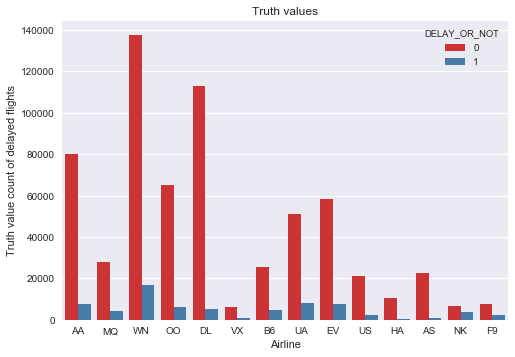

In [126]:
sns.countplot(x='AIRLINE',hue='DELAY_OR_NOT',data=original_dataframe, palette="Set1");
plt.xlabel("Airline")
plt.ylabel("Truth value count of delayed flights")
plt.title("Truth values");

In [127]:
#Let's look at the mean delay % for each airline (truth)
original_dataframe.groupby("AIRLINE").mean()

,MONTH,DAY,DAY_OF_WEEK,DISTANCE,DELAY_OR_NOT
AIRLINE,,,,,
AA,7.492990,15.702702,3.982537,1030.405972,0.089200
AS,6.629149,15.660970,3.995075,1192.081374,0.039059
B6,6.703424,15.844847,4.025519,1015.396872,0.158610
DL,6.685036,15.696274,3.925031,844.871481,0.044208
EV,6.509722,15.658871,3.946517,460.424663,0.117134
F9,6.882463,15.616551,4.031876,955.874779,0.227183
HA,6.579478,15.765392,3.996642,576.001119,0.033209
MQ,6.390953,15.747458,3.986414,420.250085,0.136017
NK,6.885886,15.925957,4.067474,972.141610,0.373686


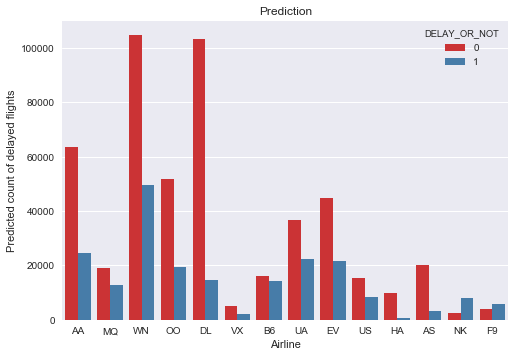

In [128]:
predicted_dataframe['DELAY_OR_NOT'] = y_pred_remain
sns.countplot(x='AIRLINE',hue='DELAY_OR_NOT',data=predicted_dataframe,palette="Set1");
plt.xlabel("Airline")
plt.ylabel("Predicted count of delayed flights")
plt.title("Prediction"); 

In [129]:
#Let's look at the mean delay % for each airline (PREDICTION)
predicted_dataframe.groupby("AIRLINE").mean()

,MONTH,DAY,DAY_OF_WEEK,DISTANCE,DELAY_OR_NOT
AIRLINE,,,,,
AA,7.492990,15.702702,3.982537,1030.405972,0.278279
AS,6.629149,15.660970,3.995075,1192.081374,0.138678
B6,6.703424,15.844847,4.025519,1015.396872,0.469872
DL,6.685036,15.696274,3.925031,844.871481,0.124195
EV,6.509722,15.658871,3.946517,460.424663,0.325175
F9,6.882463,15.616551,4.031876,955.874779,0.602014
HA,6.579478,15.765392,3.996642,576.001119,0.073881
MQ,6.390953,15.747458,3.986414,420.250085,0.402238
NK,6.885886,15.925957,4.067474,972.141610,0.766610


In [130]:
#Now take a look at how many flights we classify FALSE POSITIVE and FALSE NEGATIVE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
print(confusion_matrix(y_test_remain,y_pred_remain))

tn_logreg1, fp_logreg1, fn_logreg1, tp_logreg1 = metrics.confusion_matrix(y_test_remain,y_pred_remain).astype('float').ravel()

print("\nThe true positive rate for the weighted logistic regression model:",tp_logreg1/(tp_logreg1 + fn_logreg1))

[[478467 154626]
 [ 18645  53203]]

The true positive rate for the weighted logistic regression model: 0.740493820287


**Comparing the two plots above (truth and prediction, respectively) we see that our model predicts more delayed flights than there actually are: Predicted delayed 207829 (TP:53203,FP:154626), True delayed total 71,848 out of 700,000 flights in the remaining dataset (see the confusion matrix above). In other words, we have more FPRs than FNRs which makes sense as our data is highly unbalanced towards not delayed flights and our model is balanced in a way to put extra weight on the positive classification.** <br>

**E.g. for airlines "NK" and "F9", more flights are predicted to be delayed than on time, than in the truth baseline. However, this is to be expected given our AUC of the classification model is ~80%.**

**Airlines with most delays: 'NK' has 76%/37% delayed flights (predicted/ground truth) followed by 'F9': 60%/22% and 'B6': 47%/16% . We can see that the percentage of delayed flights predicted is higher than ground truth in all cases, which is consistent with the high false positive ratio I have with my model.**

**Speculation: if the user of my model preferred to get more false positives/false negatives (depending whether the user is more concerned about learning that a flight is predicted to be delayed when it's on time (FPR) or a flight is predicted to be on time when it is delayed - FNR. I would imagine for e.g., a businessman, being on the side of caution and having more FPRs than FNRs and taking precations to not e.g., miss a business meeting, might be a more useful use-case.**

**Question 7**<br>
(15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.

In [131]:
#First, we want to look at lenght of flight GIVEN the flight is delayed - only select observations when a flight is truly delayed
new_df_regre = df.copy(deep=True)[df.DELAY_OR_NOT==1]
#drop everything as it was, but keep ARRIVAL_TIME as that will be our response variable

del new_df_regre['DATE']
del new_df_regre['SCHEDULED_TIME']
del new_df_regre['ELAPSED_TIME']
del new_df_regre['FLIGHT_NUMBER']
del new_df_regre['TAIL_NUMBER']

del new_df_regre['DEPARTURE_DELAY']
del new_df_regre['AIR_SYSTEM_DELAY']
del new_df_regre['AIRLINE_DELAY']
del new_df_regre['SECURITY_DELAY']
del new_df_regre['LATE_AIRCRAFT_DELAY']
del new_df_regre['WEATHER_DELAY']

In [132]:
new_df_regre.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,ARRIVAL_DELAY,DISTANCE,DELAY_OR_NOT
19,1,4,7,WN,PHL,ATL,18:35:00,20:50:00,132.0,666,1
25,7,22,3,EV,BRO,DFW,17:33:00,19:20:00,98.0,482,1
28,3,23,1,OO,LAS,SEA,18:15:00,21:02:00,128.0,867,1
54,3,12,4,US,LGA,BOS,14:00:00,15:03:00,38.0,184,1
59,4,27,1,EV,SHV,DFW,16:41:00,17:45:00,148.0,190,1


In [133]:
new_df_regre.shape

(82107, 11)

In [134]:
#Change time to decimal in scheduled dep and arr
date_str_dep = list(new_df_regre.SCHED_DEP)
date_str_arr = list(new_df_regre.SCHED_ARR)
time_tuples_dep = []
time_tuples_arr = []
for i,j in zip(date_str_dep,date_str_arr):
    time_tuple_dep = time.strptime(i, "%H:%M:%S")
    time_tuple_arr = time.strptime(j, "%H:%M:%S")
    time_tuples_dep.append(time_tuple_dep.tm_hour+time_tuple_dep.tm_min/60)
    time_tuples_arr.append(time_tuple_arr.tm_hour+time_tuple_arr.tm_min/60)
new_df_regre['SCHED_DEP'] = np.array(time_tuples_dep)
new_df_regre['SCHED_ARR'] = np.array(time_tuples_arr)

In [135]:
#Check we have continuos time in decimals (hours) and that we only have DELAYED == True observations
new_df_regre.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,ARRIVAL_DELAY,DISTANCE,DELAY_OR_NOT
19,1,4,7,WN,PHL,ATL,18.583333,20.833333,132.0,666,1
25,7,22,3,EV,BRO,DFW,17.550000,19.333333,98.0,482,1
28,3,23,1,OO,LAS,SEA,18.250000,21.033333,128.0,867,1
54,3,12,4,US,LGA,BOS,14.000000,15.050000,38.0,184,1
59,4,27,1,EV,SHV,DFW,16.683333,17.750000,148.0,190,1


In [136]:
#create a log response variable ARRIVAL TIME
new_df_regre['ARRIVAL_DELAY']=np.log(new_df_regre['ARRIVAL_DELAY'])

In [164]:
#Now, we need to convert our categorical variables
cols_to_change =['MONTH','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']

new_df_dummy_regre = pd.get_dummies(new_df_regre,columns=cols_to_change)

#Subsample the data to reduce the # of observations. 
new_df_sample_regre = new_df_dummy_regre.sample(n=16000,random_state=6)

#Split the data in test and training (see Lecture 5)
np.random.seed(9001)
data_train_regre, data_test_regre = train_test_split(new_df_sample_regre,test_size=0.33, random_state=0)

#Check we actually got the right shapes
print(new_df_sample_regre.shape,df.shape,data_train_regre.shape,data_test_regre.shape)
data_train_regre.head()

(16000, 1091) (804941, 22) (10720, 1091) (5280, 1091)


,SCHED_DEP,SCHED_ARR,ARRIVAL_DELAY,DISTANCE,DELAY_OR_NOT,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
1506,12.383333,12.566667,4.919981,177,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710891,22.333333,23.833333,4.615121,414,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576919,15.250000,16.466667,3.295837,280,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754464,15.650000,19.583333,2.708050,1599,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55146,18.250000,21.000000,4.043051,861,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#now we standardize our continuous variables
p_data_train_regre = data_train_regre.copy(deep=True)

p_data_train_regre.loc[:,"SCHED_DEP":"DISTANCE"] = (data_train_regre.loc[:,"SCHED_DEP":"DISTANCE"] - data_train_regre.loc[:,"SCHED_DEP":"DISTANCE"].mean())/data_train_regre.loc[:,"SCHED_DEP":"DISTANCE"].std()

#test set - use mean and std of the training set
p_data_test_regre=data_test_regre.copy(deep=True)
p_data_test_regre.loc[:,"SCHED_DEP":"DISTANCE"]=(data_test_regre.loc[:,"SCHED_DEP":"DISTANCE"]-data_train_regre.loc[:,"SCHED_DEP":"DISTANCE"].mean())/data_train_regre.loc[:,"SCHED_DEP":"DISTANCE"].std()

In [139]:
#create x-train, y-train
x_train_regre = p_data_train_regre.copy(deep=True).drop('ARRIVAL_DELAY',axis=1)
y_train_regre = p_data_train_regre.ARRIVAL_DELAY

x_test_regre = p_data_test_regre.copy(deep=True).drop('ARRIVAL_DELAY',axis=1)
y_test_regre = p_data_test_regre.ARRIVAL_DELAY

In [140]:
#We create our regression model by performing regularized linear regression - Lasso.

Lasso_pipe = Pipeline([ ('mlr', LassoCV(cv=3)
                           )])
Lasso_pipe.fit(x_train_regre, y_train_regre)

Pipeline(steps=[('mlr', LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

In [141]:
from sklearn.metrics import r2_score

y_pred_train = Lasso_pipe.predict(x_train_regre)
y_pred = Lasso_pipe.predict(x_test_regre)

print("R^2 accuracy prediction on the training set")
print(r2_score(y_train_regre,y_pred_train))
print("R^2 accuracy prediction on the test set")
print(r2_score(y_test_regre,y_pred))

R^2 accuracy prediction on the training set
0.0538784085414
R^2 accuracy prediction on the test set
0.0327098717967


**I achieved R^2 over 3% on the test set so I am in the clear! I used Lasso regression with cross validation as it allows to regularize features coefficients and also removes not-significant coefficients.**

# 209 Additional questions
(10pts) Engineer two additional features that will help improve the classification model's performance.<br>




# First engineered feature

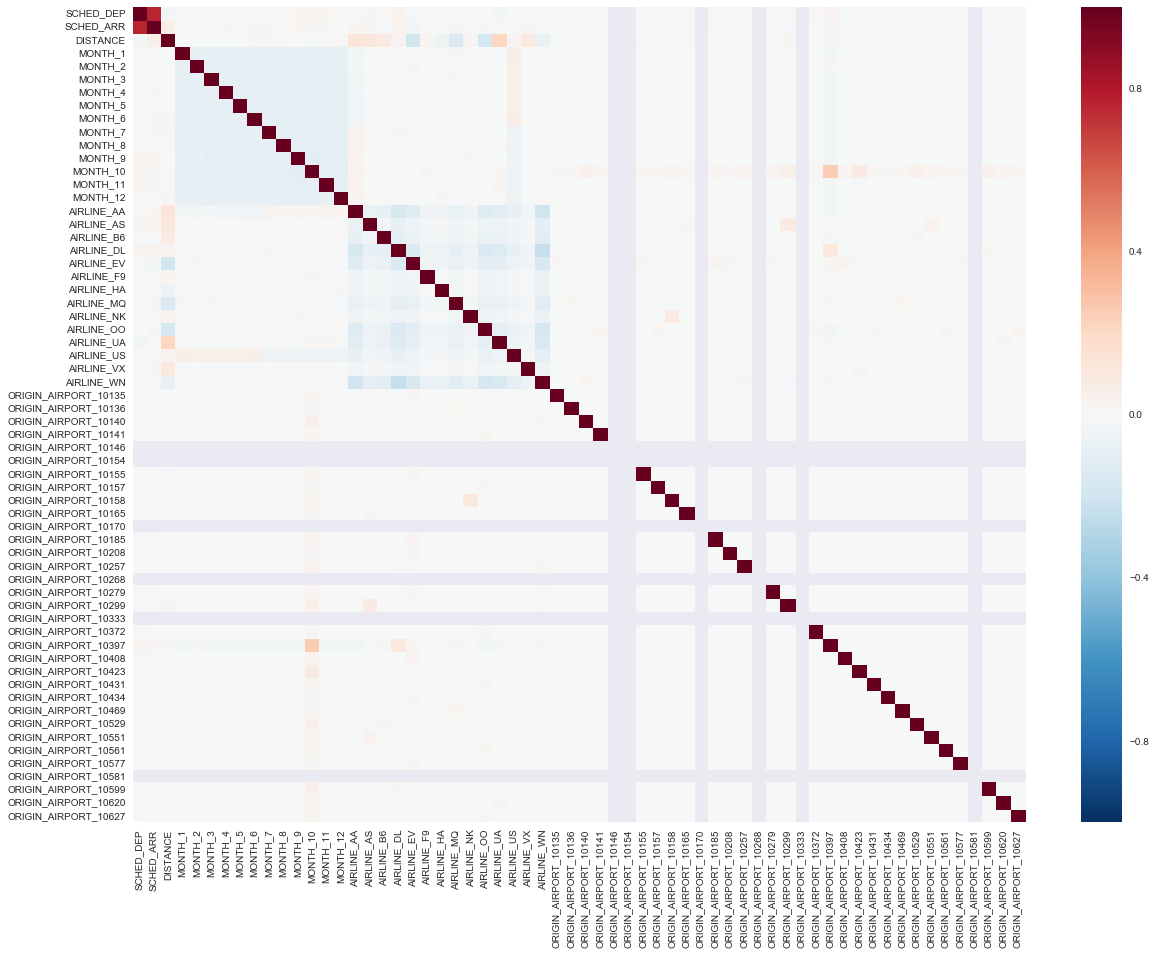

In [142]:
#Let's take a look to find how some of my features are correlated.
x_train.columns[53:67]
add = [i for i in range(53,100)]

features_to_look_at = [i for i in range(15)]
for i in add:
    features_to_look_at.append(i)
a=np.corrcoef(x_train.iloc[:,features_to_look_at].T)
plt.figure(figsize=(20,15))
sns.heatmap(a,xticklabels=list(x_train.iloc[:,features_to_look_at].columns), yticklabels=list(x_train.iloc[:,features_to_look_at].columns));

**It is hard to tell which features are correlated from the correlation matrix above (we can only display a small subset of the predictors given our predictor space is too large. We get some blank values since certain airports do not have enough flights to calculate the correlation matrix**

In [143]:
#We will add the interaction feature between day of the week - Thursday and scheduled departure time. 
#We saw in the visualisation that Thursday has the largest % of delayed flights
#and also that evening-hours flights have a higher percentage of delayed than morning ones
#It is computationally not viable to go through all the different interaction terms (even of degree 2), given our large feature space
#So we have to think about which combinations might make logical sense.

x_train_eng1 = p_data_train.copy(deep=True).drop('DELAY_OR_NOT',axis=1)
y_train_eng1 = p_data_train.DELAY_OR_NOT

x_test_eng1 = p_data_test.copy(deep=True).drop('DELAY_OR_NOT',axis=1)
y_test_eng1 = p_data_test.DELAY_OR_NOT

In [146]:
#Creating the interaction featured between Thursday and time of departure
x_train_eng1['inter_time_day']= x_train_eng1.DAY_OF_WEEK_4*x_train_eng1.SCHED_DEP
x_test_eng1['inter_time_day']= x_test_eng1.DAY_OF_WEEK_4*x_test_eng1.SCHED_DEP

In [147]:
# Fit cross-validated weighted 'L2'-penalized logistic regression 
clf_eng = LogisticRegressionCV(fit_intercept=True, penalty='l2',class_weight='balanced')
clf_eng.fit(x_train_eng1, y_train_eng1)

y_train_hat = clf_eng.predict(x_train_eng1)

print("Training set prediction accuracy of logistic regression =", accuracy_score(y_train_eng1, y_train_hat))

Training set prediction accuracy of logistic regression = 0.760253731343


In [148]:
auc_logreg_eng = metrics.roc_auc_score(y_test_eng1, clf_eng.predict_proba(x_test_eng1)[:,1])
print("The AUC score without engineered features on the test set ",auc_logreg_test)
print("The AUC score with a engineered feature on the test set",auc_logreg_eng)

The AUC score without engineered features on the test set  0.820862632096
The AUC score with a engineered feature on the test set 0.821622046718


**We achieved slight improvemenent from AUC of 0.821 to 0.822 on the test set, which may be small, but given the fact we have over 1300 features, this interaction feature still adds a bit of accuracy. I observed most delayed flights happen on Thursdays and also in the evening from the visualisation, thus combining these two features added a bit of classification accuracy makes a logical sense.**

In [149]:
#Now test the model with the engineered feature on the entire dataset
x_test_remain['inter_time_day'] = x_test_remain.DAY_OF_WEEK_4*x_test_remain.SCHED_DEP

In [150]:
#Calculate the AUC score
auc_logreg_eng_rem = metrics.roc_auc_score(y_test_remain, clf_eng.predict_proba(x_test_remain)[:,1])

In [151]:
print("AUC on the remaining data without engineered features",auc_logreg_rem)
print("AUC on the remaining data WITH a engineered features",auc_logreg_eng_rem)

AUC on the remaining data without engineered features 0.823005059613
AUC on the remaining data WITH a engineered features 0.822875047292


**Despite achieving a minimal improvement with the first engineered feature on the test set, we actually did slightly worse on the remaining dataset.**

# Second engineered feature

In [152]:
#Let's get rid of the airports which have less than 100 flights in a year
# - to reduce the complexity of our model by engineering the ORIGIN_AIRPORT feature

new_df_eng = df.copy(deep=True)
del new_df_eng['DATE']
del new_df_eng['SCHEDULED_TIME']
del new_df_eng['ELAPSED_TIME']
del new_df_eng['FLIGHT_NUMBER']
del new_df_eng['TAIL_NUMBER']
del new_df_eng['ARRIVAL_DELAY']
del new_df_eng['DEPARTURE_DELAY']
del new_df_eng['AIR_SYSTEM_DELAY']
del new_df_eng['AIRLINE_DELAY']
del new_df_eng['SECURITY_DELAY']
del new_df_eng['LATE_AIRCRAFT_DELAY']
del new_df_eng['WEATHER_DELAY']

In [153]:
#Change time to decimal in scheduled dep and arr
date_str_dep = list(new_df_eng.SCHED_DEP)
date_str_arr = list(new_df_eng.SCHED_ARR)
time_tuples_dep = []
time_tuples_arr = []
for i,j in zip(date_str_dep,date_str_arr):
    time_tuple_dep = time.strptime(i, "%H:%M:%S")
    time_tuple_arr = time.strptime(j, "%H:%M:%S")
    time_tuples_dep.append(time_tuple_dep.tm_hour+time_tuple_dep.tm_min/60)
    time_tuples_arr.append(time_tuple_arr.tm_hour+time_tuple_arr.tm_min/60)
new_df_eng['SCHED_DEP'] = np.array(time_tuples_dep)
new_df_eng['SCHED_ARR'] = np.array(time_tuples_arr)

In [154]:
#Now, we need to convert our categorical variables
cols_to_change =['MONTH','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']

new_df_dummy = pd.get_dummies(new_df_eng,columns=cols_to_change)

#get the airports with only more than 100 flights
indices_to_keep = new_df.ORIGIN_AIRPORT.value_counts()[list(new_df.ORIGIN_AIRPORT.value_counts()>100)].index
collection = []
for c in new_df_dummy.columns:
    if "ORIGIN_AIRPORT" in c or "DESTINATION_AIRPORT" in c:
        tag = c.replace("ORIGIN_AIRPORT_", "").replace("DESTINATION_AIRPORT_","")
        if not tag in indices_to_keep:
            collection.append(c)
new_df_dummy=new_df_dummy.drop(collection, axis=1)
#Subsample the data to reduce the # of observations. 
new_df_sample = new_df_dummy.sample(n=100000,random_state=6)

#Split the data in test and training (see Lecture 5)
np.random.seed(9001)
data_train_eng, data_test_eng = train_test_split(new_df_sample,test_size=0.33, random_state=0)

#Check we actually got the right shapes
print(new_df_sample.shape,df.shape,data_train_eng.shape,data_test_eng.shape)
data_train_eng.head()

(100000, 784) (804941, 22) (67000, 784) (33000, 784)


,SCHED_DEP,SCHED_ARR,DISTANCE,DELAY_OR_NOT,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,...,DESTINATION_AIRPORT_TWF,DESTINATION_AIRPORT_TXK,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
492825,17.450000,18.883333,460,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152130,12.816667,15.550000,867,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108541,15.750000,17.700000,867,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
508329,12.866667,18.300000,1452,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422830,5.500000,6.616667,201,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
#now we standardize our continuous variables
p_data_train_eng = data_train_eng.copy(deep=True)

p_data_train_eng.loc[:,"SCHED_DEP":"DISTANCE"] = (data_train_eng.loc[:,"SCHED_DEP":"DISTANCE"] - data_train_eng.loc[:,"SCHED_DEP":"DISTANCE"].mean())/data_train_eng.loc[:,"SCHED_DEP":"DISTANCE"].std()

#test set - use mean and std of the training set
p_data_test_eng=data_test_eng.copy(deep=True)
p_data_test_eng.loc[:,"SCHED_DEP":"DISTANCE"]=(data_test_eng.loc[:,"SCHED_DEP":"DISTANCE"]-data_train_eng.loc[:,"SCHED_DEP":"DISTANCE"].mean())/data_train_eng.loc[:,"SCHED_DEP":"DISTANCE"].std()

In [156]:
p_data_train_eng.head()

,SCHED_DEP,SCHED_ARR,DISTANCE,DELAY_OR_NOT,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,...,DESTINATION_AIRPORT_TWF,DESTINATION_AIRPORT_TXK,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
492825,0.965907,0.848591,-0.594743,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152130,-0.016644,0.164565,0.084816,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108541,0.605403,0.605762,0.084816,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
508329,-0.006041,0.728886,1.061577,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422830,-1.568225,-1.668623,-1.027189,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
x_train_eng2 = p_data_train_eng.copy(deep=True).drop('DELAY_OR_NOT',axis=1)
y_train_eng2 = p_data_train_eng.DELAY_OR_NOT

x_test_eng2 = p_data_test_eng.copy(deep=True).drop('DELAY_OR_NOT',axis=1)
y_test_eng2 = p_data_test_eng.DELAY_OR_NOT

In [158]:
# Fit cross-validated weighted L2 logistic regression 
clf_eng2 = LogisticRegressionCV(fit_intercept=True, penalty='l2',class_weight='balanced')
clf_eng2.fit(x_train_eng2, y_train_eng2)

y_train_hat = clf_eng2.predict(x_train_eng2)

print("Training set prediction accuracy of logistic regression =", accuracy_score(y_train_eng2, y_train_hat))

Training set prediction accuracy of logistic regression = 0.756597014925


In [159]:
auc_logreg_eng2 = metrics.roc_auc_score(y_test_eng2, clf_eng2.predict_proba(x_test_eng2)[:,1])
print("The AUC score without engineered features on the test set ",auc_logreg_test)
print("The AUC score with a engineered feature (number of airports) on the test set",auc_logreg_eng2)

The AUC score without engineered features on the test set  0.820862632096
The AUC score with a engineered feature (number of airports) on the test set 0.821096182128


**We can see we improved our accuracy by engineering the "ORIGIN_AIRPORTS" feature by a bit, but most importantly we reduced the feature space from 1,300 to about 700, which improves the computational speed significantly.**

(5pts) Add one additional feature from a data source not given to you. Do this only after you complete the rest of the exam.

**Given lack of time, I will just add the "diverted" occurences feature and only look at January as I won't have enough time to clean and concatenate all of the months. I will add the feature called "DIVERTED" to see whether DIVERTED affected delay flights**

In [206]:
#read the dataset I downloaded from https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
jan_df = pd.read_csv("Jan_15_flights.csv")

In [207]:
jan_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DEL15,DIVERTED,ACTUAL_ELAPSED_TIME,DISTANCE,DIV_AIRPORT_LANDINGS,Unnamed: 13
0,1,22,4,19790,LGA,MCO,2050,2354,0.0,0.0,203.0,950.0,0,NaN
1,1,22,4,19790,ATL,LGA,1245,1459,0.0,0.0,105.0,762.0,0,NaN
2,1,22,4,19790,SAN,DTW,1150,1914,0.0,0.0,263.0,1956.0,0,NaN
3,1,22,4,19790,ATL,AGS,1909,2001,0.0,0.0,46.0,143.0,0,NaN
4,1,22,4,19790,ATL,IAH,1342,1501,0.0,0.0,140.0,689.0,0,NaN


In [235]:
#fill in for 0s, we will only be using ARR_DEL15 as our response which has NaNs, other variables with NaN;s will be dropped.
my_df = jan_df.fillna(0)

In [236]:
my_df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_DEL15', 'DIVERTED',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'DIV_AIRPORT_LANDINGS',
       'Unnamed: 13'],
      dtype='object')

In [237]:
del my_df['ACTUAL_ELAPSED_TIME']
del my_df['DIV_AIRPORT_LANDINGS'] #duplicate to DIVERTED 
del my_df['Unnamed: 13']

In [238]:
my_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DEL15,DIVERTED,DISTANCE
0,1,22,4,19790,LGA,MCO,2050,2354,0.0,0.0,950.0
1,1,22,4,19790,ATL,LGA,1245,1459,0.0,0.0,762.0
2,1,22,4,19790,SAN,DTW,1150,1914,0.0,0.0,1956.0
3,1,22,4,19790,ATL,AGS,1909,2001,0.0,0.0,143.0
4,1,22,4,19790,ATL,IAH,1342,1501,0.0,0.0,689.0


In [239]:

cols_to_change =['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','AIRLINE_ID','ORIGIN','DEST']

#hot-encode
new_df_dummy = pd.get_dummies(my_df,columns=cols_to_change)

#Subsample the data to reduce the # of observations. 
new_df_sample = new_df_dummy.sample(n=50000,random_state=6)

#Split the data in test and training (see Lecture 5)
np.random.seed(9001)
data_train, data_test = train_test_split(new_df_sample,test_size=0.33, random_state=0)

#Check we actually got the right shapes
print(new_df_sample.shape,df.shape,data_train.shape,data_test.shape)
data_train.head()

(50000, 682) (804941, 22) (33500, 682) (16500, 682)


,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DEL15,DIVERTED,DISTANCE,MONTH_1,DAY_OF_MONTH_1,DAY_OF_MONTH_2,DAY_OF_MONTH_3,DAY_OF_MONTH_4,...,DEST_TYR,DEST_TYS,DEST_UST,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_YAK,DEST_YUM
81209,1000,1405,1.0,0.0,2614.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171347,2150,2309,0.0,0.0,358.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321159,915,1005,0.0,0.0,181.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25575,1710,1824,0.0,0.0,376.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177273,1000,1338,0.0,0.0,2565.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
#standardize the data
p_data_train=data_train.copy(deep=True)
p_data_train.iloc[:,[0,1,4]]=(data_train.iloc[:,[0,1,4]]-data_train.iloc[:,[0,1,4]].mean())/data_train.iloc[:,[0,1,4]].std()

#test set - use mean and std of the training set
p_data_test=data_test.copy(deep=True)
p_data_test.iloc[:,[0,1,4]]=(data_test.iloc[:,[0,1,4]]-data_train.iloc[:,[0,1,4]].mean())/data_train.iloc[:,[0,1,4]].std()

In [241]:
p_data_train.head()

,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DEL15,DIVERTED,DISTANCE,MONTH_1,DAY_OF_MONTH_1,DAY_OF_MONTH_2,DAY_OF_MONTH_3,DAY_OF_MONTH_4,...,DEST_TYR,DEST_TYS,DEST_UST,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_YAK,DEST_YUM
81209,-0.687726,-0.208120,1.0,0.0,3.053485,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171347,1.763939,1.660808,0.0,0.0,-0.748522,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321159,-0.868936,-1.035079,0.0,0.0,-1.046818,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25575,0.825911,0.658120,0.0,0.0,-0.718187,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177273,-0.687726,-0.346636,0.0,0.0,2.970906,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
x_train = p_data_train.copy(deep=True).drop('ARR_DEL15',axis=1)
y_train = p_data_train.ARR_DEL15

x_test = p_data_test.copy(deep=True).drop('ARR_DEL15',axis=1)
y_test = p_data_test.ARR_DEL15

In [243]:
# Fit cross-validated weighted L2 logistic regression 
clf = LogisticRegressionCV(fit_intercept=True, penalty='l2',class_weight='balanced')
clf.fit(x_train, y_train)

y_train_hat = clf.predict(x_train)

print("Training set prediction accuracy of logistic regression =", accuracy_score(y_train, y_train_hat))

Training set prediction accuracy of logistic regression = 0.672208955224


In [244]:
clf_test_score = score(clf,x_test,y_test)
print("Accuracy on the test set achieved:")
print(clf_test_score)

Accuracy on the test set achieved:
overall accuracy       0.662545
accuracy on class 0    0.668646
accuracy on class 1    0.638715
dtype: float64


In [245]:
auc_logreg_test = metrics.roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
print("The AUC score on the test set auc_logreg",auc_logreg_test)

The AUC score on the test set auc_logreg 0.711382941648


**In this last 209a subproblem, I added DIVERT feature. It is inconclusive to say whether it improved since I was not able to pull in the whole 2015 year in time from the website. I still beat the benchmark AUC provided by the Hint on this Midterm!.**

**Question 8**<br>
(20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.

Summary: After pre-processing and exploration of the data I have decided to eliminate certain features as described above. I believe the various "delay" features are not useful in predicting the delay events since they are sort of after-the-fact (e.g., delayed departure is already after-the-fact feature). In visualisation, I found that select features (Airline, Hour of the day, month, day of the week) likely heavily determine the probability of a delayed flight - see diagrams. Then, I decided to use the weighted logistic regression for classification. I based this decision mainly on the fact we have an unbalanced training set (only 10% of observations are delayed flight events), lack of assumption that we have multivariate normally distributed data (exclusion of LDA/QDA), and also finding the best score with weight logistic regression among classification models (kNN too computationally expensive, decision tree clearly overfitting on the training set). My model performed fairly well, with AUC of 82% on the whole dataset (exc. sample). Of note, the coefficients of features in weighted logistic regression dictate their importance to a classification decision (the lower the coefficient, including negative, the less contributing it is). Next up, with my model, I had a high False Positive classification decisions rate (~75%) but I was limited by an unbalanced dataset. Additionally, the False Negatives rate was better (~4%). Also, a high FPR might be better than high FNR if our model were to be used in practice - people err on the side of caution whether a flight will be delayed or not to make arrangements given they will likely be late.

In the second part, I chose the logarithm of "ARRIVAL_TIME" as a response variable to build a predictive model for the length of the delay. I chose the cross-validated L2-penalized Lasso regression to build my model. I chose Lasso because it eliminates features non-important for predicting the response variable and I also wanted to regularize to avoid overfitting on the training set (in contrast, Ridge does not eliminate features completely, only minimizes their weight). I achieved R^2 of ~3.4% which is above the given baseline. Further improvements could be made by e.g.,expanding the training set with Polynomial interaction terms before Lasso regression, however, in case of >1000 predictors, this is too computationally expensive. I also found PCA was not useful in case of reducing dimensionality when dealing with categorical variables (which we have many in this hot-encoded dataset).

Finally, for 209a, after looking at a subset of predictors in a correlation matrix, I was not able to clearly see which ones are correlated so I used "common sense" and tried a combination of a day with worst percentage of delayed flights (Thursday) with scheduled departure time - which had fairly high coefficient in logistic regression. I was able to achieve only very slight AUC improvement.

The second feature engineering was adjusting one existing feature - dropping airports with less than 100 flights from the dataset. This also did not significantly improved AUC, but it majorly reduced the complexity of the model (from 1300 to 700 features).

Finally, for the additional added feature, I used DIVERTED (bool: 0/1) from the Transportation Bureau website to see whether DIVERTED flights significantly affect prediction of delays. I followed the same steps as in previous analyses and got an AUC of 71%. This is caused by the fact I only had time to clean January 2015 and not concatenate months.